# Logistic Regression

Logistic regression is a type of statistical analysis that is used to model the relationship between a binary dependent variable (also called the outcome variable) and one or more independent variables (also called predictor variables). It is a type of regression analysis that is commonly used in machine learning for classification tasks.

In logistic regression, the dependent variable is modeled as a function of the independent variables, using a logistic function that maps any real-valued input to a probability value between 0 and 1. The logistic function, also called the sigmoid function, is an S-shaped curve that transforms the input values to the range of 0 and 1, which can be interpreted as the probability of the dependent variable taking on the value 1 (in a binary classification setting).

The logistic regression model estimates the coefficients of the independent variables that best fit the data and predicts the probability of the dependent variable based on the values of the independent variables. The coefficients of the model can be interpreted as the effect of each independent variable on the dependent variable.

Logistic regression is commonly used in a variety of applications, such as medical diagnosis, credit scoring, spam filtering, and many other fields where binary classification is required

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score



In [27]:
data = pd.read_csv('LogisticRegression.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [28]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [29]:
data.info(

)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [30]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


<AxesSubplot: xlabel='Purchased', ylabel='count'>

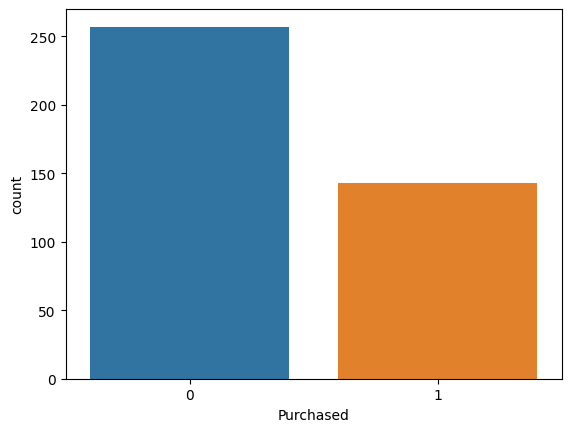

In [31]:
sns.countplot(x='Purchased',data=data)

<AxesSubplot: ylabel='Frequency'>

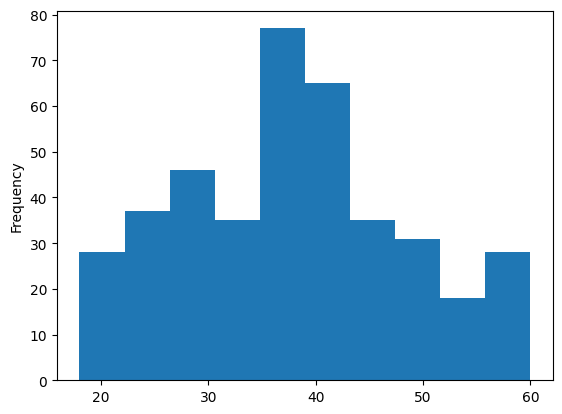

In [32]:
data["Age"].plot.hist()

<AxesSubplot: >

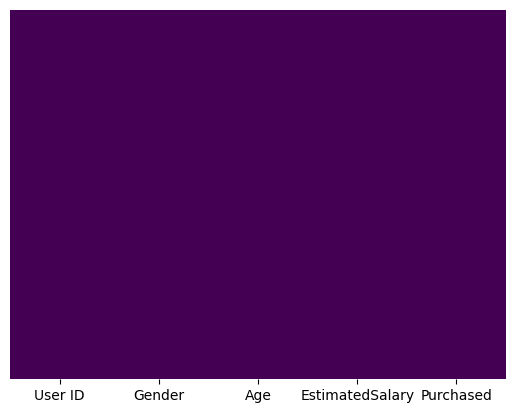

In [33]:
sns.heatmap(data.isnull() , yticklabels=False , cbar=False , cmap='viridis')

## Traning data

In [45]:
x = data.iloc[:,[2,3]].values
y = data.iloc[:,4].values

In [90]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [91]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)


LogisticRegression()

In [92]:
predictions = logmodel.predict(x_test)

# Accuracy

There are different methods to evaluate the accuracy of a logistic regression model. Some of the most common methods include:

 -  Confusion Matrix: A confusion matrix is a table that shows the number of correct predictions and misclassifications for each class. The four categories of the confusion matrix are true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

- Accuracy: Accuracy is the proportion of correctly classified instances over the total number of instances. It is calculated as (TP+TN)/(TP+TN+FP+FN).

- Precision: Precision is the proportion of true positives over the total number of predicted positives. It is calculated as TP/(TP+FP).

- Recall (Sensitivity): Recall is the proportion of true positives over the total number of actual positives. It is calculated as TP/(TP+FN).

- F1 Score: The F1 score is the harmonic mean of precision and recall. It is calculated as 2*(precision*recall)/(precision+recall).

- Receiver Operating Characteristic (ROC) curve: The ROC curve is a graphical representation of the trade-off between sensitivity and specificity. The area under the ROC curve (AUC) is often used as a measure of the overall performance of a logistic regression model.

- Cross-Validation: Cross-validation is a method used to assess the generalization ability of a model. In k-fold cross-validation, the data is split into k folds, and the model is trained on k-1 folds and tested on the remaining fold. This process is repeated k times, and the average performance is used as an estimate of the model's accuracy.

In [93]:
# Confusion Matrix
#       PN |  PY
# _________|_____
# AN |  TN |  FP
# AP |  FN |  TP

confusion_matrix(y_test,predictions)


array([[52,  6],
       [10, 32]], dtype=int64)

In [94]:
accuracy_score(y_test,predictions)

0.84

## F1 Score

F1_score = (2(Precision)(Recall))/(Precision+Recall)

In [95]:
# assume y_true and y_pred are the true and predicted labels, respectively
f1 = f1_score(y_test, predictions, average='macro')  # f1 score for the positive class

print("F1 score: ", f1)


F1 score:  0.8333333333333333
